In [1]:
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal, glorot_uniform
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

2022-07-09 09:35:00.536931: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-09 09:35:00.536960: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/calcifer/virtualenvs/ai/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(ds_train, ds_test), info = tfds.load("mnist", split=["train", "test"], with_info=True)

2022-07-09 09:35:02.481098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-09 09:35:02.481135: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-09 09:35:02.481163: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (calcifer-Inspiron-7370): /proc/driver/nvidia/version does not exist
2022-07-09 09:35:02.481571: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/home/calcifer/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",


In [4]:
# To numpy
x_train = np.stack([record['image'] for record in ds_train.as_numpy_iterator()])
y_train = np.stack([record['label'] for record in ds_train.as_numpy_iterator()])
x_test = np.stack([record['image'] for record in ds_test.as_numpy_iterator()])
y_test = np.stack([record['label'] for record in ds_test.as_numpy_iterator()])

In [5]:
print("Shape X train:", x_train.shape)
print("Shape y train:", y_train.shape)
print("Shape X test:", x_test.shape)
print("Shape y test:", y_test.shape)

Shape X train: (60000, 28, 28, 1)
Shape y train: (60000,)
Shape X test: (10000, 28, 28, 1)
Shape y test: (10000,)


In [6]:
# Standardization
x_train_std = (x_train - 255) / 255
x_test_std = (x_test - 255) / 255
y_train_ohc = to_categorical(y_train)
y_test_ohc = to_categorical(y_test)

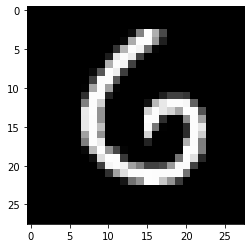

In [7]:
# Plot some samples
idx = np.random.randint(60000)
fig = plt.figure
plt.imshow(x_train[idx].reshape(28, 28), cmap='gray')
plt.show()

In [10]:
model = Sequential()
model.add(
    Conv2D(
        input_shape=(28, 28, 1),
        filters=8,
        kernel_size=(4, 4),
        strides=(2, 2),
        padding="same",
        kernel_initializer="he_normal",
        bias_initializer='zeros',
        activation="relu",
    )
)
model.add(
    Conv2D(
        input_shape=(28, 28, 1),
        filters=4,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_initializer="he_normal",
        bias_initializer='zeros',
        activation="relu",
    )
)
model.add(Flatten())
model.add(
    Dense(
        units=10,
        kernel_initializer="glorot_uniform",
        bias_initializer='zeros',
        activation="softmax",
    )
)

In [96]:
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 8)         136       
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 4)         292       
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 8,278
Trainable params: 8,278
Non-trainable params: 0
_________________________________________________________________


In [105]:
batch_size = 256
epochs = 10

In [202]:
model.fit(
    x=x_train_std,
    y=y_train_ohc,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test_std, y_test_ohc),
    shuffle=True,
    workers=8,
    use_multiprocessing=True,
)

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 8.8979e-04 - accuracy: 0.9998 - val_loss: 0.3956 - val_accuracy: 0.9681
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 8.7813e-04 - accuracy: 0.9998 - val_loss: 0.3957 - val_accuracy: 0.9678
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 8.7868e-04 - accuracy: 0.9998 - val_loss: 0.3964 - val_accuracy: 0.9673
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 8.8192e-04 - accuracy: 0.9998 - val_loss: 0.3970 - val_accuracy: 0.9683
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 8.5955e-04 - accuracy: 0.9998 - val_loss: 0.3991 - val_accuracy: 0.9680
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 8.9193e-04 - accuracy: 0.9998 - val_loss: 0.4009 - val_accuracy: 0.9677
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 8.6018e-04 - accuracy: 0.9998 - val_loss: 0

Validation accuracy: 96.77%


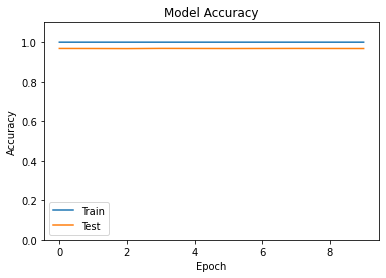

In [207]:
acc = model.history.history['accuracy']
acc_val =  model.history.history['val_accuracy']
plt.plot(acc)
plt.plot(acc_val)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train", "Test"])
plt.ylim((0.0,1.1))
print("Validation accuracy: {:.2%}".format(acc_val[-1]))

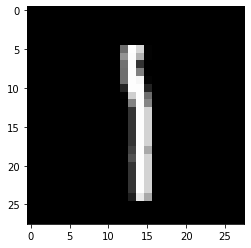

Predicted:  1
Actual:  1


In [325]:
idx = np.random.randint(10000)
fig = plt.figure
plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
plt.show()
print("Predicted: ", np.argmax(model.predict(x_test_std[idx:idx+1])[0]))
print("Actual: ", y_test[idx])